| Problem | Formula|Search Domain|
|---      |----    |----|
|SK2 |${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2+3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|
|SK2_typo|${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2-3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|

In [43]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    nadir_arr  = np.array([np.fromstring(i[1:-1],dtype=float, sep=' ') for i in np.array(result['approx_nadir'])])
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)

    final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)

    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 
    'Objectives', 'n_variables','hv','igd_plus','pop_size','solutions_shape',
    'nadir_point','ref_point',
    'exec_time', 
    'hv_exc_time', 'path', 'image_location']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Evaluations','igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# sk2
# sk2-typo
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [44]:

folder_2 = os.path.dirname(folder)
folder_2
pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_PI'
path = os.path.join(folder, filename)

result = pd.read_csv(path)



result = result.drop(columns=['xl','xu'])
sk2_typo = result.loc[result['Problem']=='SK2_TYPO'].reset_index(drop=True)
sk2 = result.loc[result['Problem']=='SK2'].reset_index(drop=True)
print(f"The number of records sk2_typo {len(sk2_typo)}")
print(f"The number of records sk2 {len(sk2)}")

The number of records sk2_typo 72
The number of records sk2 72


# SK2_TYPO

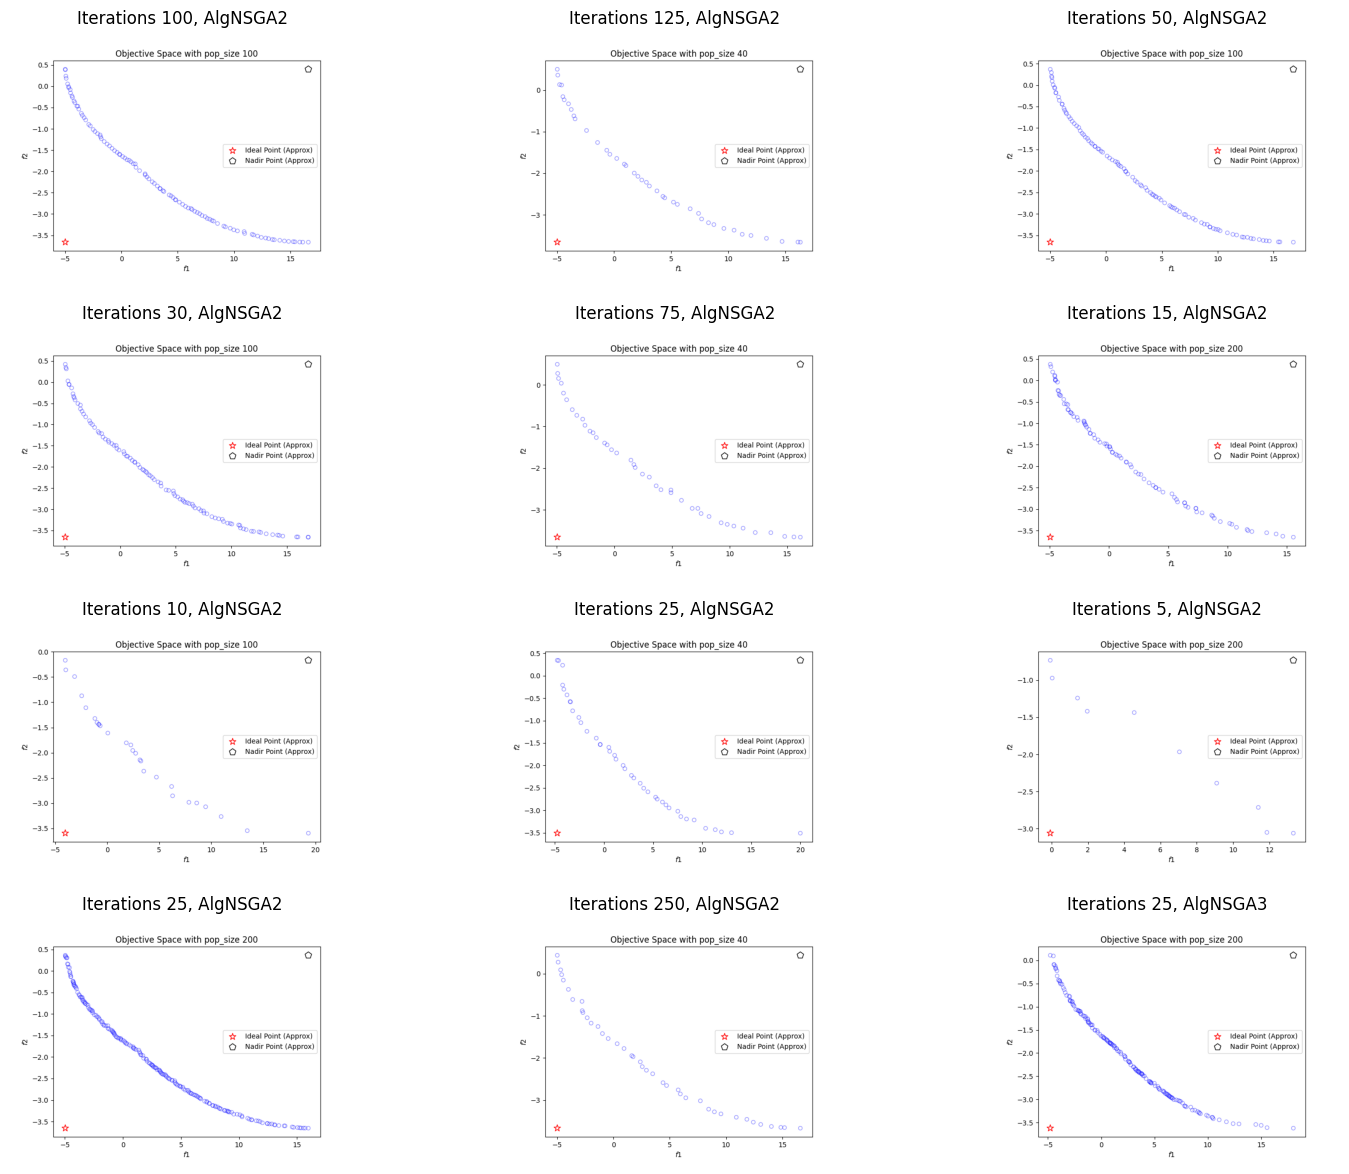

In [45]:
# more figures can be found here: Result/Images/sk2_typo/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(12):
    plt.subplot(4,3,i+1)
    f = sk2_typo['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {sk2_typo.Iteration[i]}, Alg{sk2_typo.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [46]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(sk2_typo['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([18, 1 ])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_typo_pf' ))
sk2_typo_table_1 = hv_result(sk2_typo)

Global nadir point for kur1 with two variables is :[58.33  1.01]
ref_point is [18  1]


In [47]:
ref_point = np.array([5, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_typo_pf' ))
sk2_typo_table_2 = hv_result(sk2_typo)

ref_point is [5 5]


In [48]:
pd.concat([sk2_typo_table_1,sk2_typo_table_2]).to_excel('Excel/sk2_typo.xlsx', engine = 'xlsxwriter')

# SK2

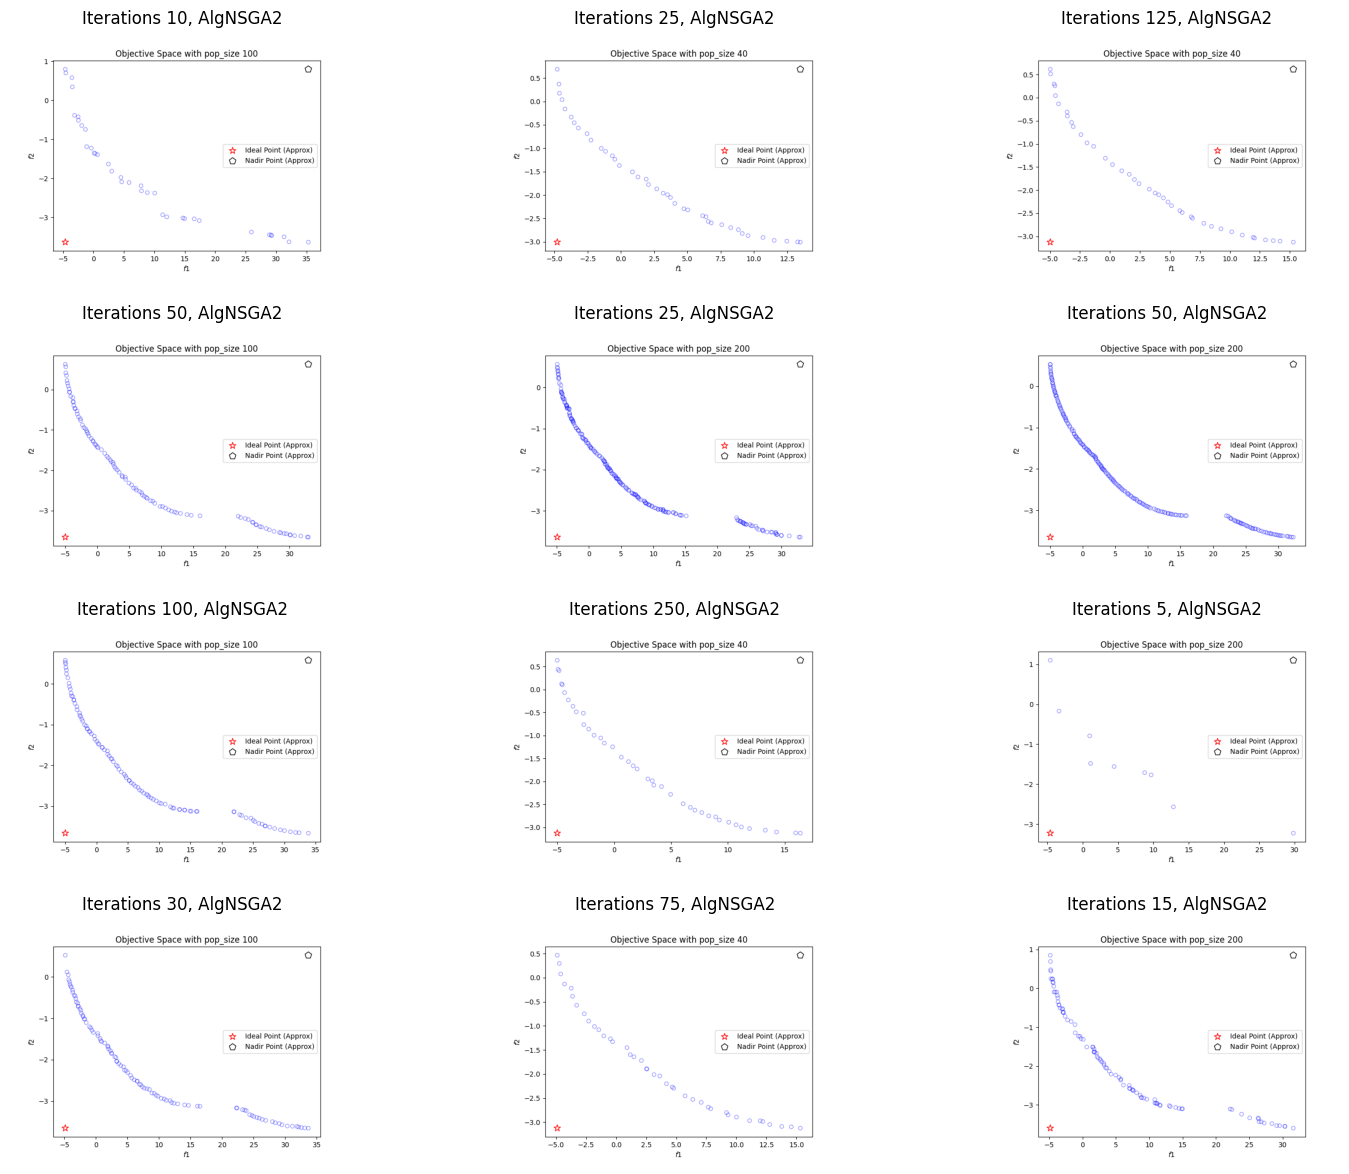

In [49]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(12):
    plt.subplot(4,3,i+1)
    f = sk2['image_location'][i+0]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {sk2.Iteration[i]}, Alg{sk2.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [50]:
nadir_arr  = np.array([np.fromstring(i[1:-1], dtype=float, sep=' ') for i in np.array(sk2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([35,0.5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_pf' ))
sk2_table = hv_result(sk2)


Global nadir point for kur1 with two variables is :[40.13  1.23]
ref_point is [35.   0.5]


In [51]:
ref_point = np.array([5,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_pf' ))
sk2_table_2 = hv_result(sk2)

ref_point is [5 5]


In [52]:
pd.concat([sk2_table,sk2_table_2]).to_excel('Excel/sk2.xlsx', engine = 'xlsxwriter')